In [1]:
import numpy as np
from scipy import linalg
import matplotlib.pyplot as plt


In [2]:
# Make the plots a bit bigger to see
# NOTE: Must be done in a separate cell
plt.rcParams['figure.dpi'] = 100

In [3]:
def gradient(f,dx,dy):
    du = np.zeros(np.shape(f))
    du[1:-1,0:] += ( (f[2:,0:] - f[1:-1,0:]) /dx)**2 + ((f[0:-2,0:] - f[1:-1,0:])/dx)**2 
    du[:,1:-1] += ((f[:,2:] - f[:,1:-1])/dy)**2 + ((f[:,0:-2] - f[:,1:-1])/dy)**2 
    du[0,:] += ((f[1,:] - f[0,:])/dx)**2 + ((f[-1,:] - f[0,:])/dx)**2
    du[-1,:] += ((f[0,0:] - f[-1,0:])/dx)**2 + ((f[-2,0:] - f[-1,0:])/dx)**2
    du[:,0] += ((f[:,1] - f[:,0])/dy)**2
    du[:,-1] += ((f[:,-2] - f[:,-1])/dy)**2
    return du


def free_energy(phi,Tc,Tb,E,r0,g2,g4,g6):
    term1 = -(1./2.)*g2*phi**2 + (1./2.)*g2*setTeff(Tb,E,phi)/Tc*phi**2
    term2 = 0.5*r0*gradient(phi,1.0,1.0)
    term3 = (1./4.)*g4*phi**4
    term4 = (1./6.)*g6*phi**6
    fe = term1 + term2 + term3 + term4
    return fe

def setTeff(Tb,E,phi):
    tbath = Tb
    gam = 0.1
    efield = 0.1*E
    return np.sqrt(tbath**2 + efield**2/(gam**2 + phi**2) )

# def setTeff(Tb, E, phi):
#     return Tb

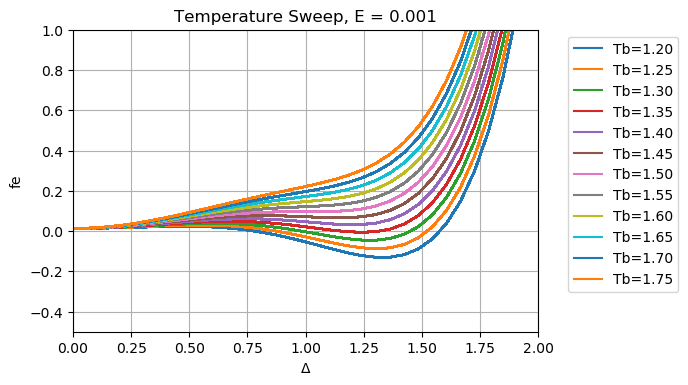

In [22]:
# phi_val = np.random.uniform(-3.0,3.0,(20,20))
Tc = 1.0
g2 = 1.0
g4 = -1.0
g6 = 0.5
r0 = 3.5
# np.sort(phi_val)
phi_val = np.linspace(-3.,3.,100)
phi_val = np.tile(phi_val,(100,100))
# phi_grad_val = np.gradient(phi_val)



# tb = 0.6
E = 0.1
# Eval = np.arange(0.2,2.8,.2)
Tval = np.arange(0.05,2.05,0.05)
# Tval = [0.1]
# E = 0.0
# print(phi_val)
# for E in Eval:
for tb in Tval:
    f = free_energy(phi_val,Tc,tb,E,r0,g2,g4,g6)
    if tb > 1.2 and tb < 1.8:
        plt.plot(phi_val[0,:],f[0,:],label='Tb='+ format(tb, '.2f'))
    
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')    
plt.ylabel("fe")
plt.xlabel(r'$\Delta$')
plt.ylim(-.5,1)
plt.xlim(0.,2.)
plt.grid(b=True,which='major', axis='both')
plt.title("Temperature Sweep, E = 0.001")
plt.savefig("disc_fe_zoom.pdf", bbox_inches='tight')
plt.show()    

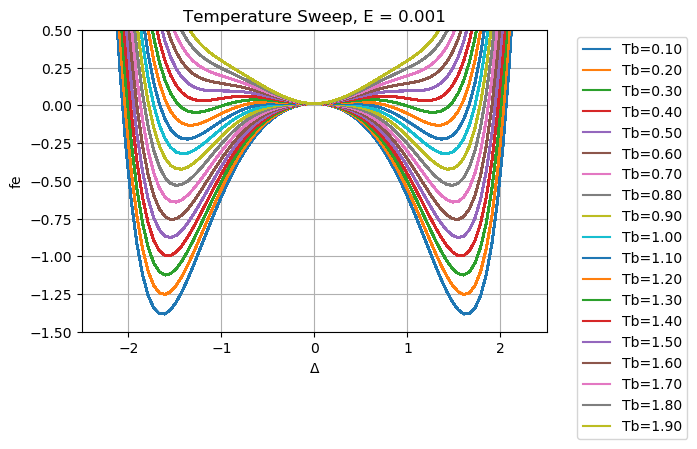

In [23]:
# phi_val = np.random.uniform(-3.0,3.0,(20,20))
Tc = 1.0
g2 = 1.0
g4 = -1.0
g6 = 0.5
r0 = 3.5
# np.sort(phi_val)
phi_val = np.linspace(-3.,3.,100)
phi_val = np.tile(phi_val,(100,100))
# phi_grad_val = np.gradient(phi_val)



# tb = 0.6
E = 0.001
# Eval = np.arange(0.2,2.8,.2)
Tval = np.arange(0.1,2.0,0.1)
# Tval = [0.1]
# E = 0.0
# print(phi_val)
# for E in Eval:
for tb in Tval:
    f = free_energy(phi_val,Tc,tb,E,r0,g2,g4,g6)
#     if tb > 1.2 and tb < 1.8:
    plt.plot(phi_val[0,:],f[0,:],label='Tb='+ format(tb, '.2f'))
    
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')    
plt.ylabel("fe")
plt.xlabel(r'$\Delta$')
plt.ylim(-1.5,0.5)
plt.xlim(-2.5,2.5)
plt.grid(b=True,which='major', axis='both')
plt.title("Temperature Sweep, E = 0.001")
plt.savefig("disc_fe.pdf", bbox_inches='tight')
plt.show()    

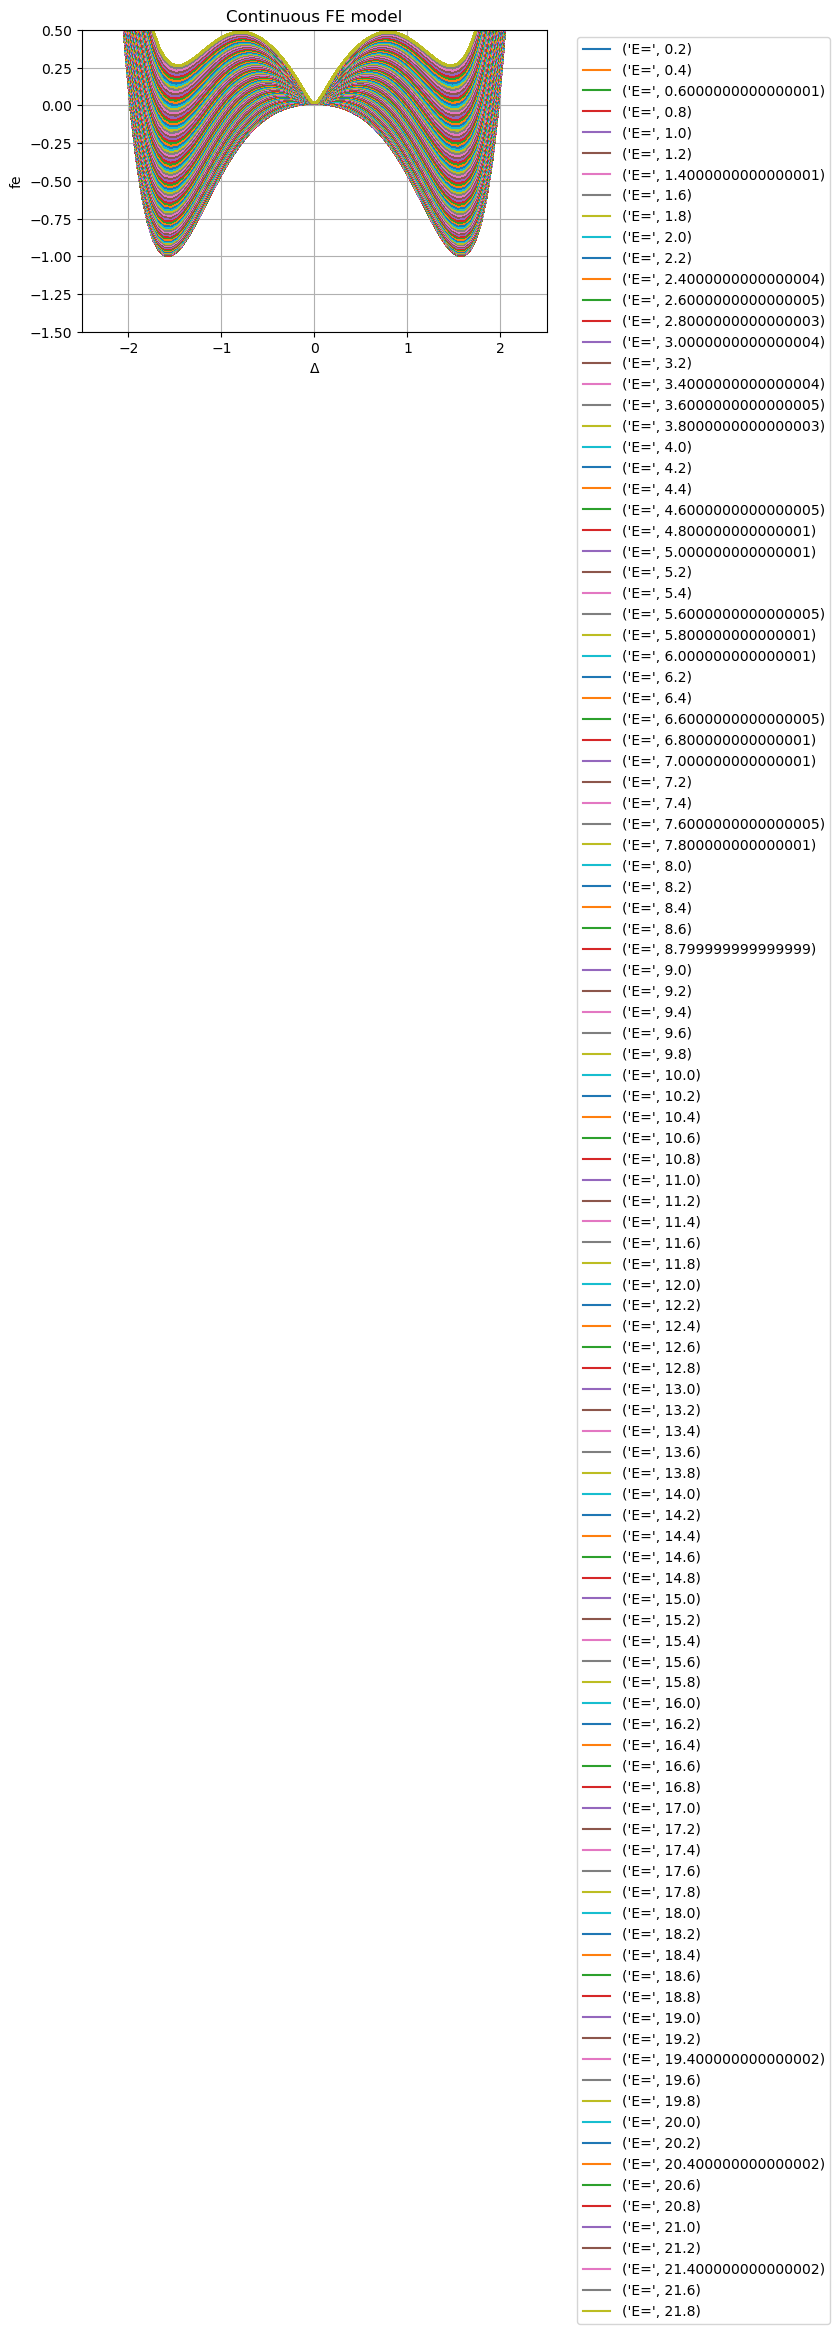

In [20]:
# phi_val = np.random.uniform(-3.0,3.0,(20,20))
Tc = 1.0
g2 = 1.0
g4 = -1.0
g6 = 0.5
r0 = 3.5
# np.sort(phi_val)
phi_val = np.linspace(-3.,3.,100)
phi_val = np.tile(phi_val,(100,100))
# phi_grad_val = np.gradient(phi_val)
tb = 0.4
E = 0.001
Eval = np.arange(2.,22.,2.)
# Tval = np.arange(0.2,1.8,0.2)
# Tval = [0.1]
# E = 0.0
# print(phi_val)
for E in Eval:
# for tb in Tval:
    f = free_energy(phi_val,Tc,tb,E,r0,g2,g4,g6)
#     plt.plot(phi_val[0,:],f[0,:],label=('Tb=', tb))
    plt.plot(phi_val[0,:],f[0,:],label=('E=', E))
    
plt.legend( bbox_to_anchor=(1.05, 1), loc='upper left')    
plt.ylabel("fe")
plt.xlabel(r'$\Delta$')
plt.ylim(-1.5,0.5)
plt.xlim(-2.5,2.5)
plt.grid(b=True,which='major', axis='both')
plt.title("Continuous FE model")
# plt.savefig("disc_fe.pdf")
plt.show()    

In [7]:
# ### Trial distribution plot ###
# path_to_file = "Data_ccr/par_set1/fluc/"
# phi0 = np.loadtxt(path_to_file + 'phi_val_22.85_1008.dat')
# phi1 = np.loadtxt(path_to_file + 'phi_val_22.90_1008.dat')

# plt.subplot(1, 2, 1)
# plt.imshow(np.transpose(phi0)**2,cmap='rainbow')
# plt.title("pre-transition")

# plt.subplot(1, 2, 2)
# plt.imshow(np.transpose(phi1)**2,cmap='rainbow')
# plt.title("post-transition")


# plt.show()

In [8]:
# mx = np.shape(phi)[0]
# my = np.shape(phi)[1]
# phi2 = phi[:,my//2]**2
# print(phi2)

# lt = np.where(phi2 < 0.5, phi2, 0.0)
# print(lt)

# width = np.count_nonzero(phi2 < 0.3)
# print(width)

In [9]:
# phi_1 = (np.transpose(phi1))**2
# phi_0 = (np.transpose(phi0))**2

# red_phi = phi_1[:,0:20]

# plt.imshow(red_phi, cmap='rainbow')

# print("Variance : ", np.var(phi_0) , np.var(red_phi))
# print("Standard Deviation : ", np.std(phi_0), np.std(red_phi))
# print("Mean : ", np.mean(phi0), np.mean(red_phi))

In [10]:
# A1 = np.arange(0.1,0.6,0.1)
# A2 = np.arange(0.8,1.1,0.1)
# A3 = np.arange(0.6,0.8,0.01)
# A = np.concatenate((A1,A3,A2))
# print(A1)
# print(A2)
# print(A3)
# print(A)